## Filtering Image and Live Sketch
- Convert BGR to GRAY
- Gaussian Blur
- Canny Edge Detection
- Threshold Inverse

## Import Library

In [79]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Load Image

In [96]:
input_image=cv2.imread('girl_red.jpg')
cv2.imshow('input image ',input_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [81]:
input_image.shape

(1920, 1080, 3)

In [97]:
image=cv2.resize(input_image,None,fx=0.5,fy=0.5)
cv2.imshow('Resize image ',image)
cv2.waitKey()
cv2.destroyAllWindows()

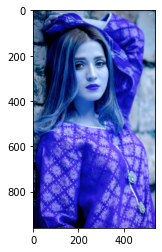

In [83]:
plt.imshow(image)

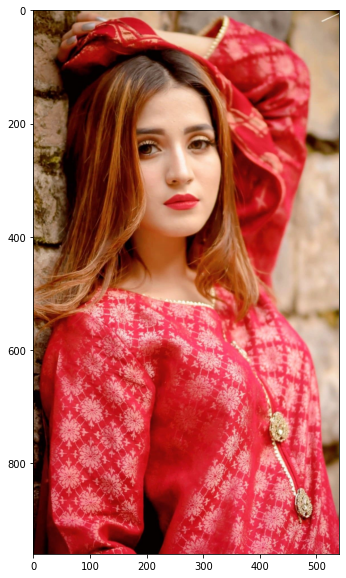

In [84]:
rgb_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(rgb_image)

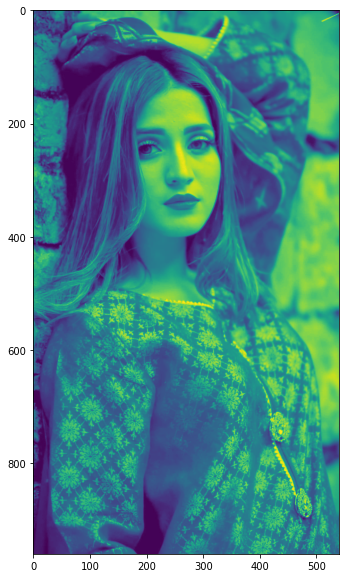

In [85]:
gray_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(gray_image)

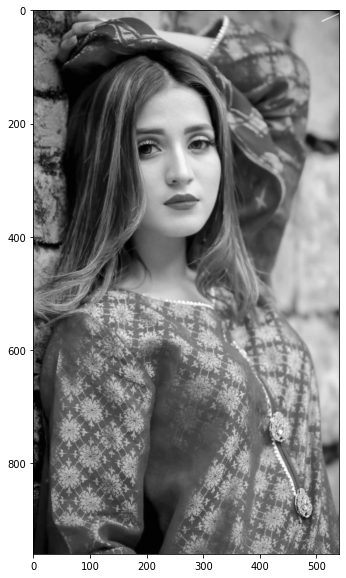

In [86]:
plt.figure(figsize=(10,10))
plt.imshow(gray_image,cmap='gray')

## Apply Filter: Gaussian Filter
- GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) -> dst

In [98]:
gaussian=cv2.GaussianBlur(gray_image,(5,5),0)
cv2.imshow('Gaussian Blur ',gaussian)
cv2.waitKey()
cv2.destroyAllWindows()

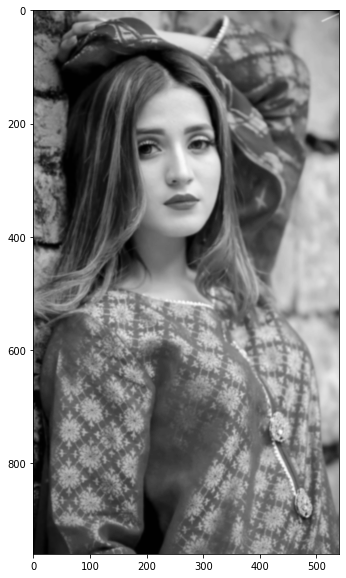

In [88]:
plt.figure(figsize=(10,10))
plt.imshow(gaussian,cmap='gray')

## Apply Canny Edge Detection
Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) -> edges

In [99]:
canny=cv2.Canny(gaussian,50,150)
cv2.imshow('Canny Edge Detection',canny)
cv2.waitKey()
cv2.destroyAllWindows()

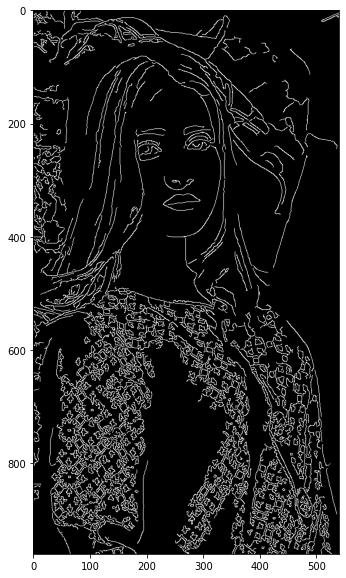

In [90]:
plt.figure(figsize=(10,10))
plt.imshow(canny,cmap='gray')

## Apply THRESH BINARY INV
threshold(src, thresh, maxval, type[, dst]) -> retval, dst

In [100]:
ret,threshinv=cv2.threshold(canny,127,255,cv2.THRESH_BINARY_INV)
cv2.imshow('thresh binary',threshinv)
cv2.waitKey()
cv2.destroyAllWindows()

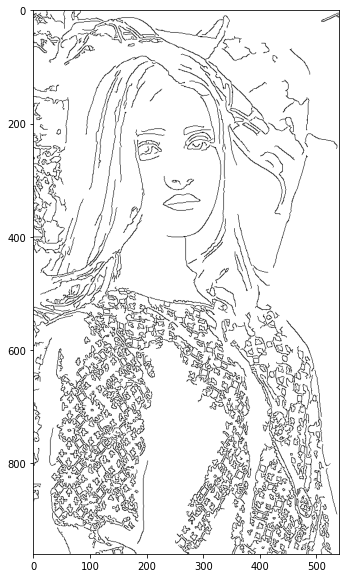

In [92]:
plt.figure(figsize=(10,10))
plt.imshow(threshinv,cmap='gray')

# Live Sketch Using Webcam
- Convert RGB to GRAY
- Gaussian Blur
- Canny Edge Detection
- Threshlod Inverse

In [102]:
import cv2
import numpy as np
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    # Convert frame to image
    image=frame
    
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gaussian_blur = cv2.GaussianBlur(image_gray, (5,5), 0)
    #cv2.imshow('Gaussian Blur',gaussian_blur)
    
    canny_edges = cv2.Canny(gaussian_blur, 50, 150)
    cv2.imshow('Canny Edge Detection',canny_edges)
    
    ret, thresh_image = cv2.threshold(canny_edges, 127, 255, cv2.THRESH_BINARY_INV)
    cv2.imshow('Sketch Image',thresh_image)
    
    if cv2.waitKey(1) == 13: 
        break

cap.release()
cv2.destroyAllWindows()      